### 2023 expenses

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [158]:
# use best matplotlib style
plt.style.use('seaborn')

C:\Users\nickglaze\AppData\Local\Temp\ipykernel_22900\3986765667.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


#### 1. reformat

In [92]:
# read multi sheet excel file
month_dfs = pd.read_excel("C:/Users/nickglaze/Downloads/expenses23.xlsx", sheet_name=None)

In [290]:
amts_df = pd.DataFrame()
notes_df = pd.DataFrame()
incomes_df = pd.DataFrame()
for month in ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sept', 'oct', 'nov', 'dec']:
    raw_df = month_dfs[month + ' 23'].copy()
    raw_df.loc[1:3, "Category"] = "Apartment"
    raw_df.loc[8:10, "Category"] = "Food"
    raw_df.loc[12:14, "Category"] = "Transportation"
    raw_df.loc[17:18, "Category"] = "Shopping"
    raw_df.loc[20:23, "Category"] = "Health"
    month_df = raw_df.loc[[1,2,3,8,9,10,12,13,14,15,17,18,20,21,22,23,25], ["Necessity", "Category", "Sub", "Amount", "Note"]].set_index(["Category", "Sub"])
    amts_df = pd.concat((amts_df, month_df[["Amount"]]), axis=1)
    notes_df = pd.concat((notes_df, month_df[["Note"]].fillna("")), axis=1)

    incomes_df.loc["Income", month + " 23"] = raw_df.loc[31, "Amount"]

amts_df.columns = [month + " 23" for month in ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sept', 'oct', 'nov', 'dec']]
notes_df.columns = [month + " 23" for month in ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sept', 'oct', 'nov', 'dec']]

amts_df.loc[("Health", "Haircut etc")] = amts_df.loc[("Health", "Haircut")].combine_first(amts_df.loc[("Health", "Haircut etc")])
amts_df.loc[("Subscriptions donations etc", pd.NA)] = amts_df.loc[("Subscriptions", pd.NA)].combine_first(amts_df.loc[("Subscriptions donations etc", pd.NA)])
amts_df.loc[("Food", "Necessary meals")] = amts_df.loc[("Food", "Necessary meals")].combine_first(amts_df.loc[("Food", "Work lunch/solo meals")])
amts_df = amts_df.drop([("Health", "Haircut"), ("Subscriptions", pd.NA), ("Food", "Work lunch/solo meals"), ("Health", "Checkups"), ("Health", "Gym")], axis=0)
amts_df = amts_df.fillna(0)

notes_df.loc[("Health", "Haircut etc")] = notes_df.loc[("Health", "Haircut")].combine_first(notes_df.loc[("Health", "Haircut etc")])
notes_df.loc[("Subscriptions donations etc", pd.NA)] = notes_df.loc[("Subscriptions", pd.NA)].combine_first(notes_df.loc[("Subscriptions donations etc", pd.NA)])
notes_df.loc[("Food", "Necessary meals")] = notes_df.loc[("Food", "Necessary meals")].combine_first(notes_df.loc[("Food", "Work lunch/solo meals")])
notes_df = notes_df.drop([("Health", "Haircut"), ("Subscriptions", pd.NA), ("Food", "Work lunch/solo meals"), ("Health", "Checkups"), ("Health", "Gym")], axis=0)
notes_df = notes_df.fillna("")

necessities = pd.Series(False, index=amts_df.index)
necessities.loc["Apartment"] = True
necessities.loc[[("Food", "Groceries"), ("Transportation", "Transit"), ("Health", "Medication"), ("Health", "Medical"), ("Health", "Haircut etc"), ("Food", "Necessary meals")]] = True

In [291]:
bonuses = pd.Series([2901, 3609+4213.33, 0, 0, 0, 0, 0, 0, 7000, 0, 0, 0,], index=[month + " 23" for month in ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sept', 'oct', 'nov', 'dec']])

incomes_df.loc["Bonus"] = bonuses

In [292]:
amts_df.to_csv("C:/Users/nickglaze/Downloads/expenses.csv")
incomes_df.to_csv("C:/Users/nickglaze/Downloads/incomes.csv")
notes_df.to_csv("C:/Users/nickglaze/Downloads/notes.csv")


#### 2. plots

In [306]:
amts_df = pd.read_csv("C:/Users/nickglaze/Downloads/expenses.csv", index_col=[0,1])
incomes_df = pd.read_csv("C:/Users/nickglaze/Downloads/incomes.csv", index_col=0)
notes_df = pd.read_csv("C:/Users/nickglaze/Downloads/notes.csv", index_col=[0,1]).fillna("")

In [314]:
mon = 'nov 23'
this_month = pd.concat((amts_df[mon], notes_df[mon]), axis=1)
this_month = this_month.sort_index()
this_month.columns = ["This month", "Note"]
this_month['Median'] = amts_df.median(axis=1)

this_month[['Median', 'This month', 'Note']] # todo color

Median  This month  \
Category                    Sub                                        
Apartment                   Internet              40.000       40.00   
                            Rent                3856.625     3981.00   
                            Utility               74.150       57.81   
Entertainment/other         NaN                  600.620      447.00   
Food                        Groceries            197.250      188.00   
                            Necessary meals      235.720      245.00   
                            Social food/drinks   949.775      461.40   
Health                      Exercise              28.080     1069.00   
                            Haircut etc            0.000        0.00   
                            Medical               42.215        0.00   
                            Medication             0.000       21.00   
Shopping                    Clothing             227.525      229.00   
                            Other                285.440      963.00   
Subscriptions donations etc NaN                   12.250       22.00   
Transportation              Transit               14.440        0.00   
                            Travel               628.920      896.50   
                            Uber/driving          89.755       12.00   

                                                                           Note  
Category                    Sub                                                  
Apartment                   Internet                                             
                            Rent                    25 dollar fee for something  
                            Utility                                              
Entertainment/other         NaN                                                  
Food                        Groceries                                            
                            Necessary meals                                      
                            Social food/drinks                                   
Health                      Exercise                            ikon pass, golf  
                            Haircut etc                                          
                            Medical                                              
                            Medication                                           
Shopping                    Clothing                                ski clothes  
                            Other                                         piano  
Subscriptions donations etc NaN                 google storage, zipcar, csp fee  
Transportation              Transit                                              
                            Travel                                               
                            Uber/driving

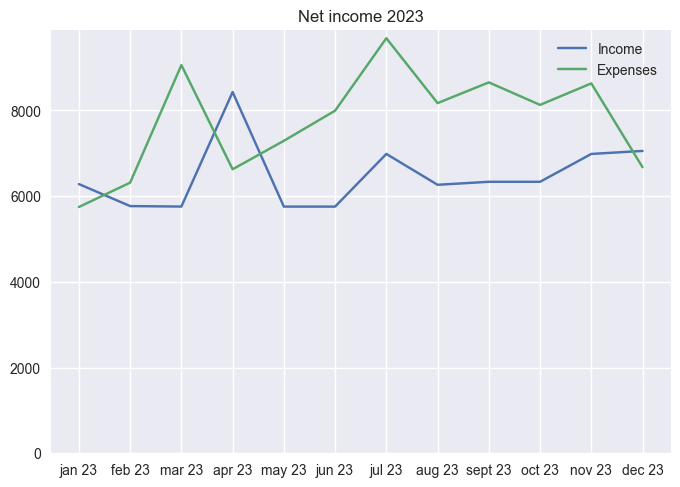

In [308]:
plt.plot(incomes_df.loc['Income'])
plt.plot(amts_df.sum())
plt.ylim(0)
plt.title("Net income 2023")
plt.legend(["Income", "Expenses"])

<AxesSubplot: title={'center': 'Disposable income'}>

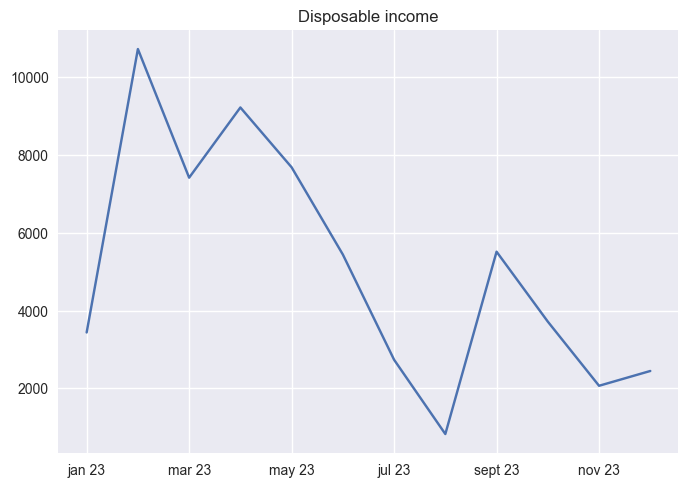

In [309]:
(incomes_df.loc['Bonus'] + incomes_df.loc['Income'] - amts_df.sum(axis=0)).cumsum().plot(title='Disposable income')

<AxesSubplot: title={'center': 'Expenses (nov 23)'}, xlabel='Category'>

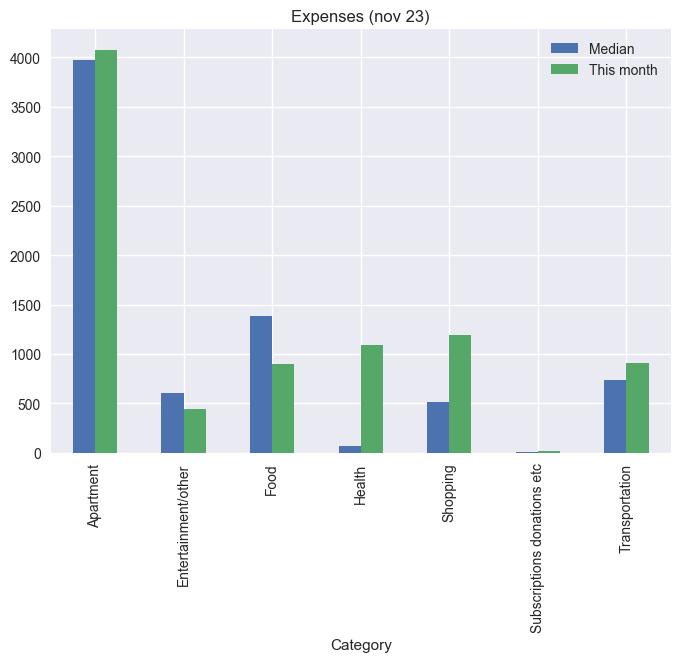

In [315]:
this_month[["Median", "This month"]].groupby('Category').sum().plot(kind="bar", title=f"Expenses ({mon})")

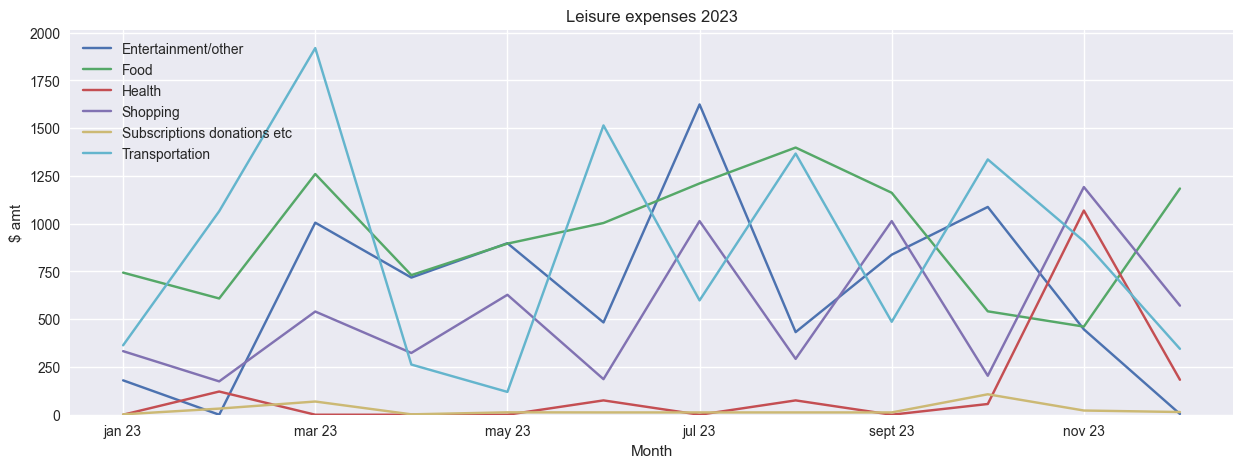

In [311]:
amts_df[~necessities].groupby("Category").sum().T.plot(figsize=(15,5), title="Leisure expenses 2023", xlabel="Month", ylabel="$ amt", ylim=0).legend(loc="upper left")

<AxesSubplot: title={'center': 'Total extra expenses'}>

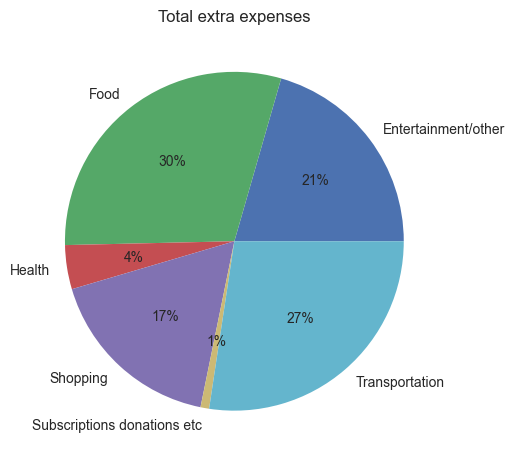

In [312]:
amts_df[~necessities].groupby("Category").sum().sum(axis=1).plot(kind="pie", autopct="%1.0f%%", title="Total extra expenses")

<AxesSubplot: title={'center': 'Total expenses'}>

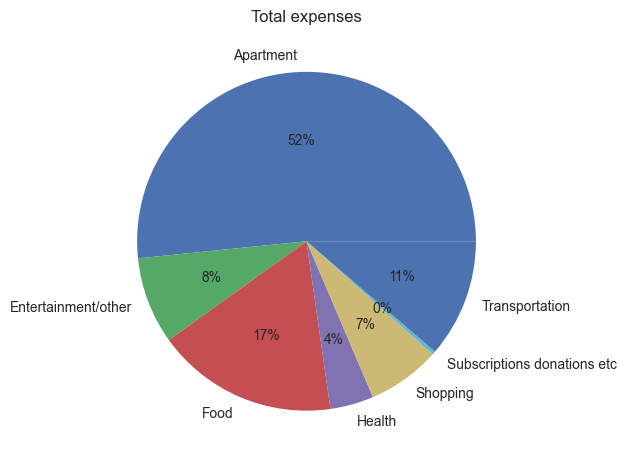

In [313]:
amts_df.groupby("Category").sum().sum(axis=1).plot(kind="pie", autopct="%1.0f%%", title="Total expenses")